In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Aditi\\Desktop\\ML\\Mini Project\\StudentsPerformance.csv")

In [14]:
# data is clusters as per the score in various subjects
scores = df.loc[:,["math score","reading score","writing score"]]
scores.rename(index = int, columns = {"math score":"mathscore","reading score":"readscr","writing score":"writingscr"},inplace=True)

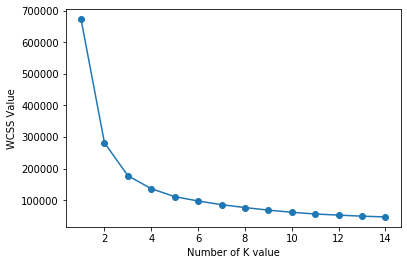

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

In [16]:
# the WCSS values help to determine the no. of cluster required for clustering

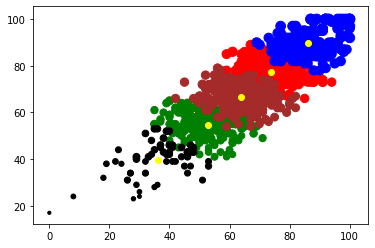

In [17]:
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit_predict(scores)
scores["examscores"] = clusters


plt.scatter(
    scores.mathscore[scores.examscores == 0],
    scores.readscr[scores.examscores == 0], 
    scores.writingscr[scores.examscores == 0],
    color="red")
plt.scatter(scores.mathscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],scores.writingscr[scores.examscores == 1],color="green")
plt.scatter(scores.mathscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],scores.writingscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mathscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],scores.writingscr[scores.examscores == 3],color="black")
plt.scatter(scores.mathscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],scores.writingscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow")
plt.show()

In [18]:
## Hierarchical Clustering

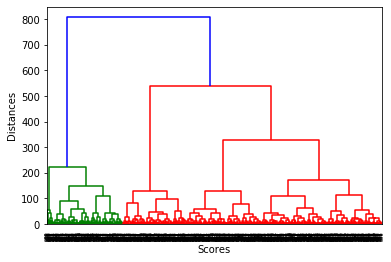

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Distances")
plt.show()

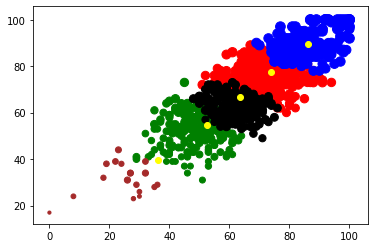

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(scores)

scores["examscores"] = cluster
plt.scatter(
    scores.mathscore[scores.examscores == 0],
    scores.readscr[scores.examscores == 0], 
    scores.writingscr[scores.examscores == 0],
    color="red")
plt.scatter(scores.mathscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],scores.writingscr[scores.examscores == 1],color="green")
plt.scatter(scores.mathscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],scores.writingscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mathscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],scores.writingscr[scores.examscores == 3],color="black")
plt.scatter(scores.mathscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],scores.writingscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow")
plt.show()